In [ ]:
# Import necessary libraries
import numpy as np  # For numerical operations
import tensorflow as tf  # For deep learning models
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For statistical data visualization
from sklearn.svm import SVC  # For Support Vector Machine classifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc  # For model evaluation metrics
from tensorflow.keras.models import Sequential  # For creating sequential neural network models
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout, LSTM, Reshape  # For different layer types in neural networks
from tensorflow.keras.utils import to_categorical  # For one-hot encoding of categorical data
from tensorflow.keras.datasets import mnist  # For loading the MNIST dataset
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from time import time  # For measuring execution time

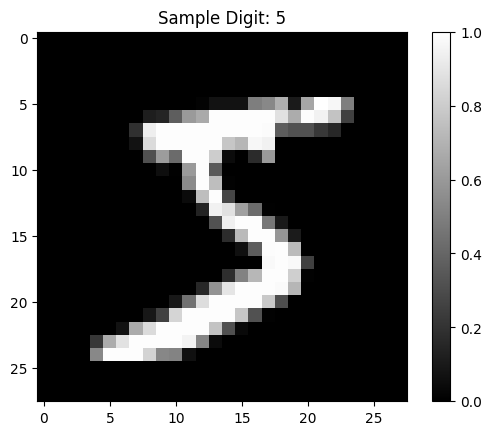

<ipython-input-3-dd80953b83ea>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="viridis")  # Create a count plot of digit labels


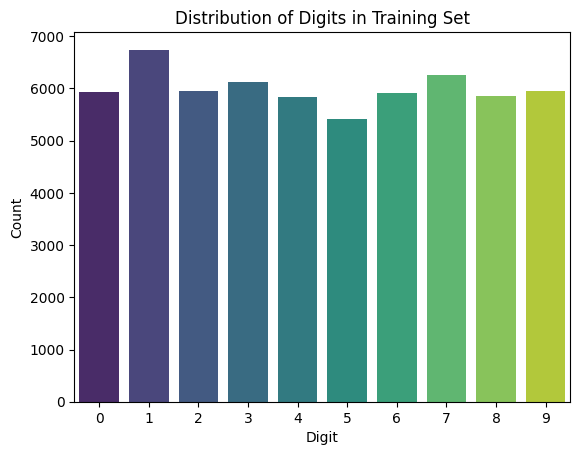

In [ ]:
# 📌 Load MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # Load training and testing data from MNIST

# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0  # Divide pixel values by 255 for normalization

# Reshape data for CNN (Convolutional Neural Network)
x_train_cnn = x_train.reshape(-1, 28, 28, 1)  # Reshape training data for CNN
x_test_cnn = x_test.reshape(-1, 28, 28, 1)  # Reshape testing data for CNN

# Reshape data for RNN (Recurrent Neural Network)
x_train_rnn = x_train.reshape(-1, 28, 28)  # Reshape training data for RNN (Samples, Timesteps, Features)
x_test_rnn = x_test.reshape(-1, 28, 28)  # Reshape testing data for RNN

# One-hot encoding for CNN & RNN
y_train_onehot = to_categorical(y_train, 10)  # Convert training labels to one-hot encoding
y_test_onehot = to_categorical(y_test, 10)  # Convert testing labels to one-hot encoding

# 📌 Visualization: Display a random digit and its pixel intensity
plt.imshow(x_train[0], cmap='gray')  # Display the first training image in grayscale
plt.title(f"Sample Digit: {y_train[0]}")  # Set the title to show the digit label
plt.colorbar()  # Show a colorbar to represent pixel intensity
plt.show()  # Display the plot

# 📌 Visualization: Plot Label Distribution
sns.countplot(x=y_train, palette="viridis")  # Create a count plot of digit labels
plt.title("Distribution of Digits in Training Set")  # Set the title of the plot
plt.xlabel("Digit")  # Label the x-axis
plt.ylabel("Count")  # Label the y-axis
plt.show()  # Display the plot

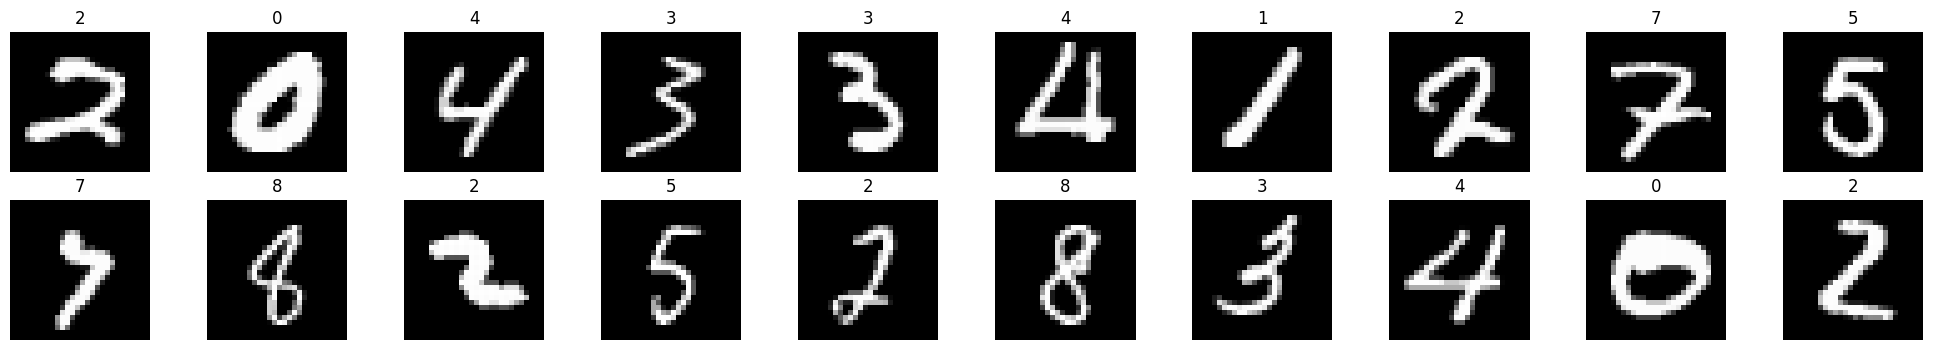

In [ ]:
import matplotlib.pyplot as plt  # For creating plots
%matplotlib inline
# To display plots within the notebook
import numpy as np  # For numerical operations, especially with arrays
from tensorflow.keras.datasets import mnist # Import mnist for loading data
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Import ImageDataGenerator

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Create an ImageDataGenerator for training data
datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale pixel values to [0, 1]
)

# Create the training data loader using flow() method
loader = {
    'train': datagen.flow(x_train.reshape(-1, 28, 28, 1), y_train, batch_size=32)
}

# Get a batch of training images and labels
dataiter = iter(loader['train'])  # Create an iterator for the training data loader
images, labels = next(dataiter)  # Get the next batch of images and labels

# Create a figure and subplots to display the images
fig, subs = plt.subplots(2, 10, figsize=(25, 4))  # Create 2 rows, 10 columns of subplots

# Iterate through the images and labels in the batch
for idx, sub in zip(np.arange(20), subs.flatten()):  # Loop through 20 images and subplots
    sub.imshow(np.squeeze(images[idx]), cmap='gray')  # Display the image in grayscale
    sub.set_title(str(labels[idx].item()))  # Set the title to the image's label
    sub.axis("off")  # Turn off axes for cleaner visualization

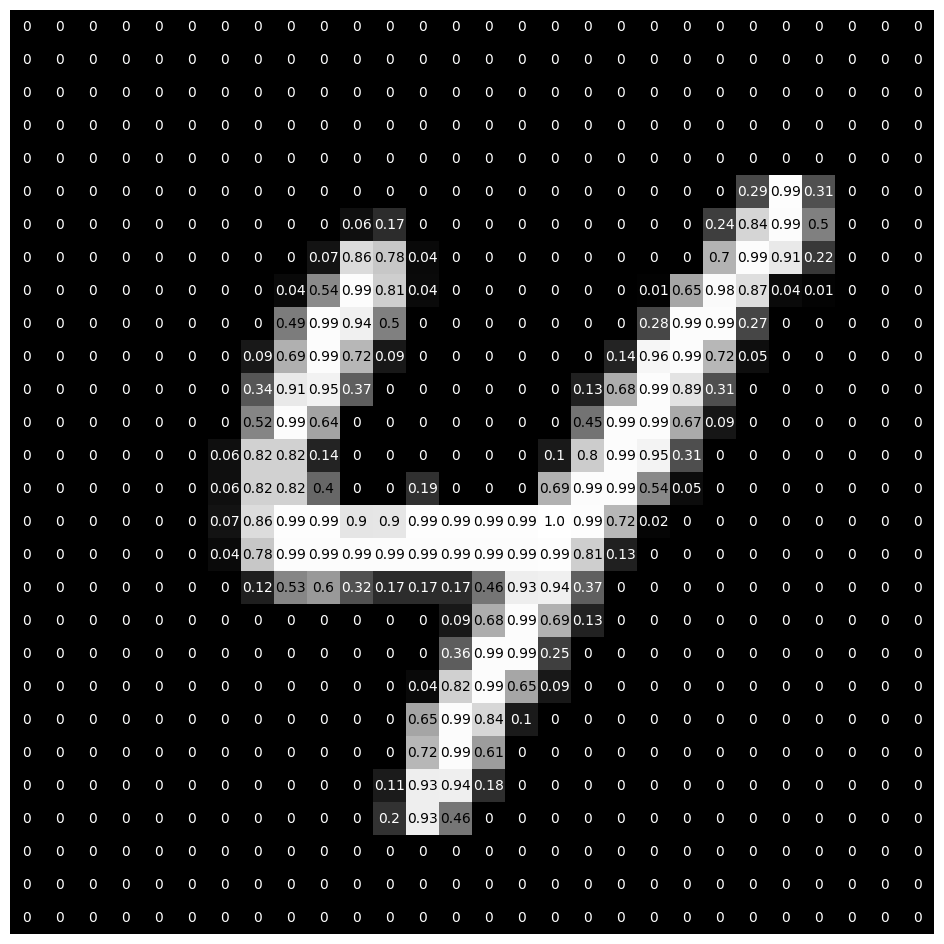

In [ ]:
# Select an image from the batch (image at index 2)
img = np.squeeze(images[2])

# Create a figure and axes for the plot
fig, sub = plt.subplots(figsize=(12, 12))

# Display the image in grayscale
sub.imshow(img, cmap='gray')

# Get the width and height of the image
width, height = img.shape

# Set a threshold for text color (based on image intensity)
thresh = img.max() / 2.5

# Iterate through each pixel of the image
for x in range(width):
    for y in range(height):
        # Get the pixel value and round it to 2 decimal places
        val = round(img[x][y], 2) if img[x][y] != 0 else 0

        # Annotate the pixel value on the image
        sub.annotate(str(val), xy=(y, x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    # Set text color based on pixel intensity and threshold
                    color='white' if img[x][y] < thresh else 'black')

        # Turn off axes for cleaner visualization
        sub.axis("off")

In [ ]:
# 📌 CNN Model Definition
def build_cnn():
    """
    Builds a Convolutional Neural Network (CNN) model for MNIST digit classification.

    Returns:
        model: Compiled Keras CNN model.
    """
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer with 32 filters, (3, 3) kernel, ReLU activation
        MaxPooling2D((2, 2)),  # Max pooling layer with (2, 2) pool size
        Conv2D(64, (3, 3), activation='relu'),  # Convolutional layer with 64 filters, (3, 3) kernel, ReLU activation
        MaxPooling2D((2, 2)),  # Max pooling layer with (2, 2) pool size
        Flatten(),  # Flatten the output for the dense layers
        Dense(128, activation='relu'),  # Dense layer with 128 units, ReLU activation
        Dropout(0.5),  # Dropout layer for regularization
        Dense(10, activation='softmax')  # Output layer with 10 units (for 10 digits), softmax activation
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model
    return model

# 📌 RNN (LSTM) Model Definition
def build_rnn():
    """
    Builds a Recurrent Neural Network (RNN) model with LSTM layers for MNIST digit classification.

    Returns:
        model: Compiled Keras RNN model.
    """
    model = Sequential([
        LSTM(128, input_shape=(28, 28), return_sequences=True),  # LSTM layer with 128 units, returning sequences
        LSTM(64),  # LSTM layer with 64 units
        Dense(64, activation='relu'),  # Dense layer with 64 units, ReLU activation
        Dense(10, activation='softmax')  # Output layer with 10 units (for 10 digits), softmax activation
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model
    return model

# 📌 CNN Model (Simplified)
def build_cnn():
    """
    Builds a simplified Convolutional Neural Network (CNN) model for MNIST digit classification.

    Returns:
        model: Compiled Keras CNN model.
    """
    model = Sequential([
        Conv2D(16, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Convolutional layer with 16 filters, (3, 3) kernel, ReLU activation
        MaxPooling2D((2, 2)),  # Max pooling layer with (2, 2) pool size
        Flatten(),  # Flatten the output for the dense layers
        Dense(64, activation='relu'),  # Dense layer with 64 units, ReLU activation
        Dense(10, activation='softmax')  # Output layer with 10 units (for 10 digits), softmax activation
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model
    return model

# 📌 RNN (LSTM) Model Definition
def build_rnn():
    """
    Builds a Recurrent Neural Network (RNN) model with LSTM layers for MNIST digit classification.

    Returns:
        model: Compiled Keras RNN model.
    """
    model = Sequential([
        LSTM(64, input_shape=(28, 28)),  # LSTM layer with 64 units
        Dense(64, activation='relu'),  # Dense layer with 64 units, ReLU activation
        Dense(10, activation='softmax')  # Output layer with 10 units (for 10 digits), softmax activation
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compile the model
    return model

# 📌 Train CNN (Fast Execution)
cnn_model = build_cnn()  # Create the CNN model
cnn_history = cnn_model.fit(x_train_cnn, y_train_onehot, validation_data=(x_test_cnn, y_test_onehot), epochs=3, batch_size=32, verbose=1)  # Train the CNN model and store history

# 📌 Train RNN (Fast Execution)
rnn_model = build_rnn()  # Create the RNN model
rnn_history = rnn_model.fit(x_train_rnn, y_train_onehot, validation_data=(x_test_rnn, y_test_onehot), epochs=3, batch_size=32, verbose=1)  # Train the RNN model and store history


# 📌 Train SVM (Small Subset for Speed)
x_train_flat, x_test_flat = x_train.reshape(-1, 28 * 28), x_test.reshape(-1, 28 * 28)  # Flatten training and testing data for SVM
svm_model = SVC(kernel='linear', probability=True)  # Create the SVM model
svm_model.fit(x_train_flat[:2000], y_train[:2000])  # Train the SVM model on a subset of data for speed

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.8980 - loss: 0.3563 - val_accuracy: 0.9752 - val_loss: 0.0793
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9784 - loss: 0.0714 - val_accuracy: 0.9782 - val_loss: 0.0656
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9861 - loss: 0.0451 - val_accuracy: 0.9826 - val_loss: 0.0530


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.7206 - loss: 0.8148 - val_accuracy: 0.9527 - val_loss: 0.1537
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.9556 - loss: 0.1469 - val_accuracy: 0.9705 - val_loss: 0.0958
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9709 - loss: 0.0953 - val_accuracy: 0.9714 - val_loss: 0.0948


SVC(kernel='linear', probability=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step


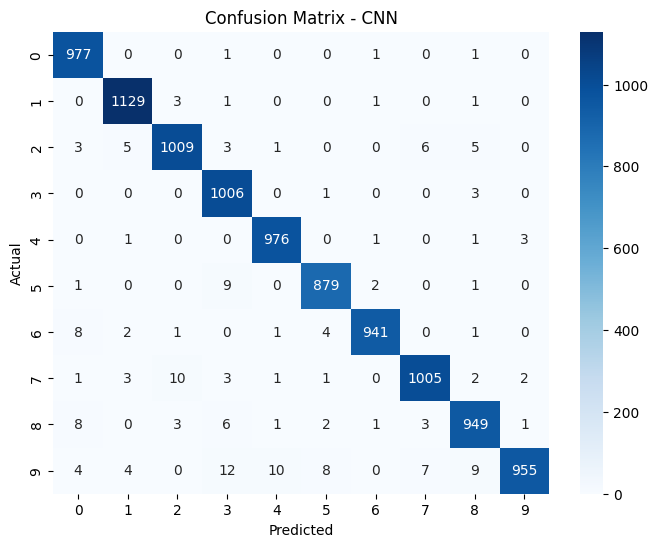

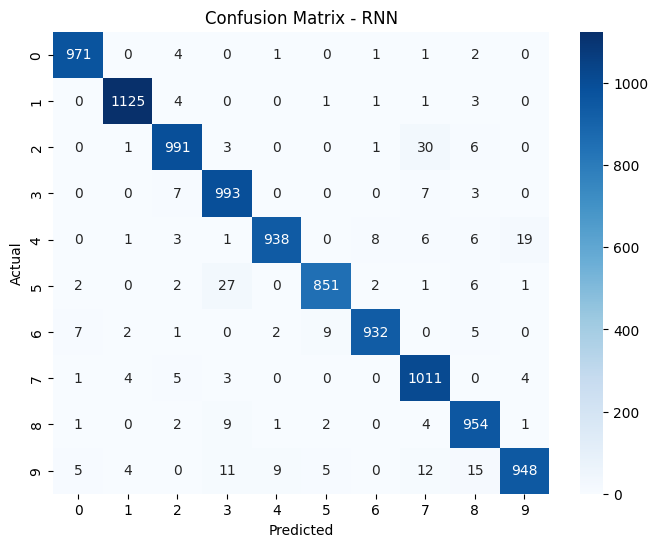

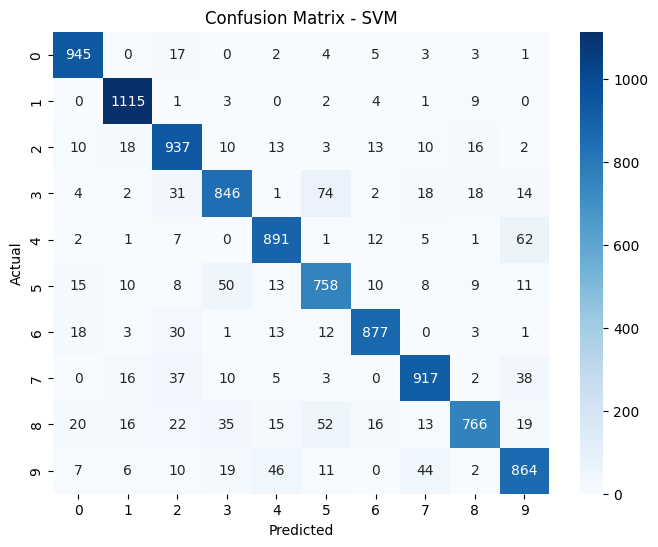

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


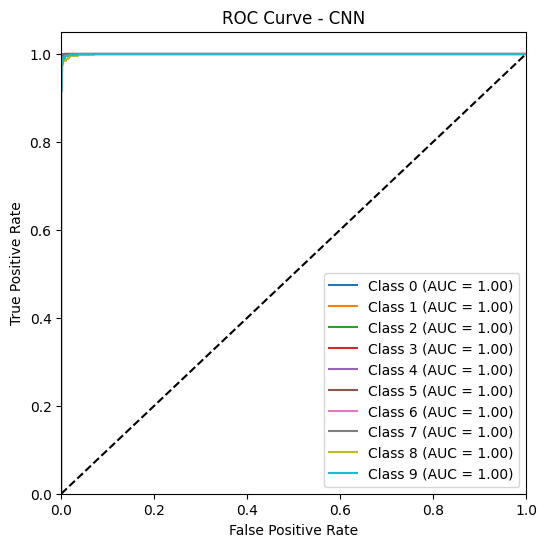

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


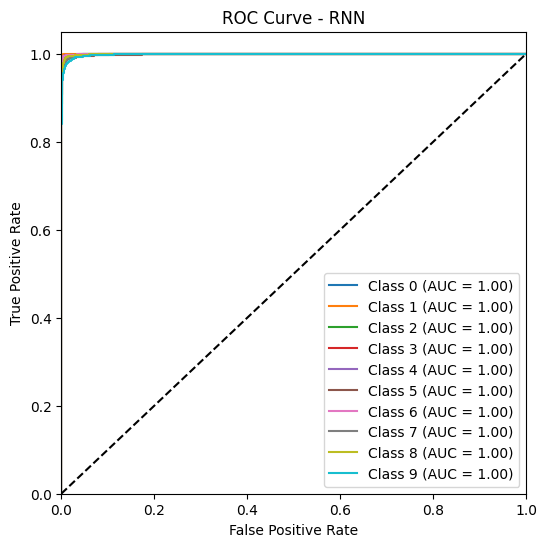

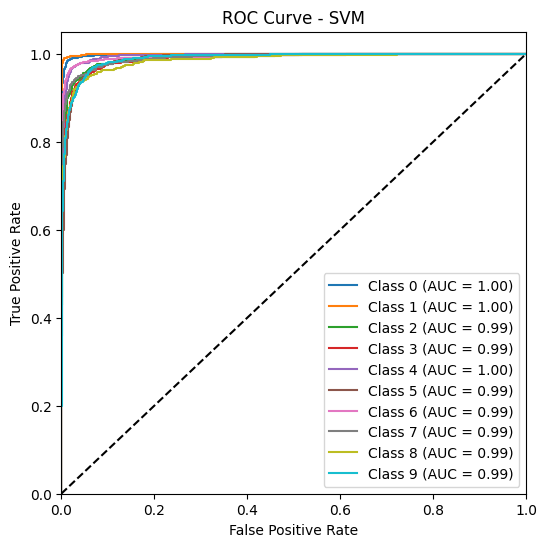

In [ ]:
# 📌 Confusion Matrix
y_pred_cnn = np.argmax(cnn_model.predict(x_test_cnn), axis=1) # CNN predictions
y_pred_rnn = np.argmax(rnn_model.predict(x_test_rnn), axis=1) # RNN predictions
y_pred_svm = svm_model.predict(x_test_flat) # SVM predictions

def plot_confusion_matrix(y_true, y_pred, title):
    """Plots confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

plot_confusion_matrix(y_test, y_pred_cnn, "CNN")
plot_confusion_matrix(y_test, y_pred_rnn, "RNN")
plot_confusion_matrix(y_test, y_pred_svm, "SVM")

# 📌 ROC Curve & AUC Score
from sklearn.preprocessing import label_binarize # For multi-class ROC
from sklearn.metrics import roc_curve, auc # For ROC and AUC

def plot_roc_curve(model, x_test, y_test, title):
    n_classes = 10  # Number of classes in MNIST

    # Get predicted probabilities (for CNN and RNN, 'predict' already returns probabilities)
    if isinstance(model, SVC):  # Check if the model is an SVM
        y_prob = model.predict_proba(x_test)  # Use predict_proba for SVM to get probabilities
    else:
        y_prob = model.predict(x_test)

    # Binarize the true labels for multiclass ROC
    y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

    # ... (rest of the function remains the same)
    # Compute ROC curve and AUC for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot all ROC curves
    plt.figure(figsize=(6, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {roc_auc[i]:.2f})")

    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f'ROC Curve - {title}')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_curve(cnn_model, x_test_cnn, y_test, "CNN")
plot_roc_curve(rnn_model, x_test_rnn, y_test, "RNN")
plot_roc_curve(svm_model, x_test_flat, y_test, "SVM")

Enter a digit (0-9): 2


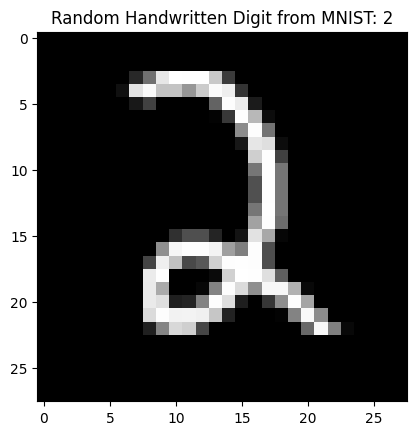

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Predictions:
 CNN: 2 
 RNN: 2 
 SVM: 2


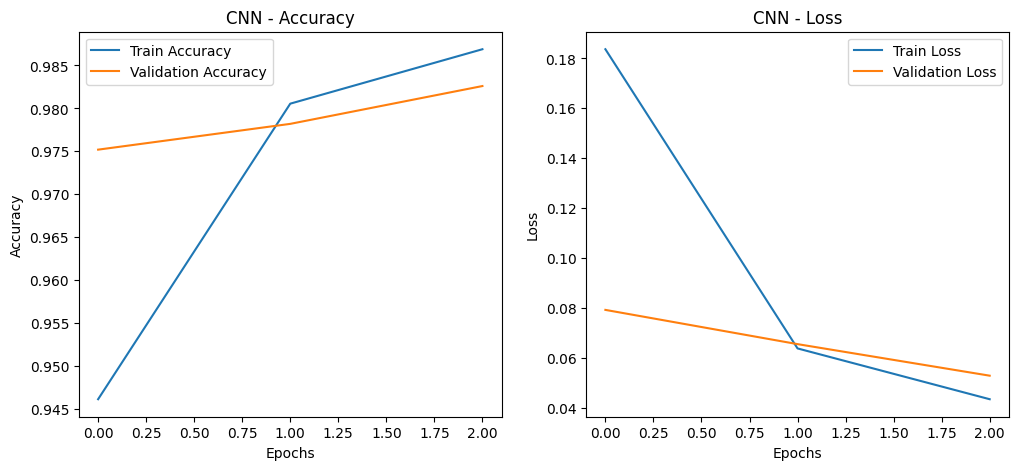

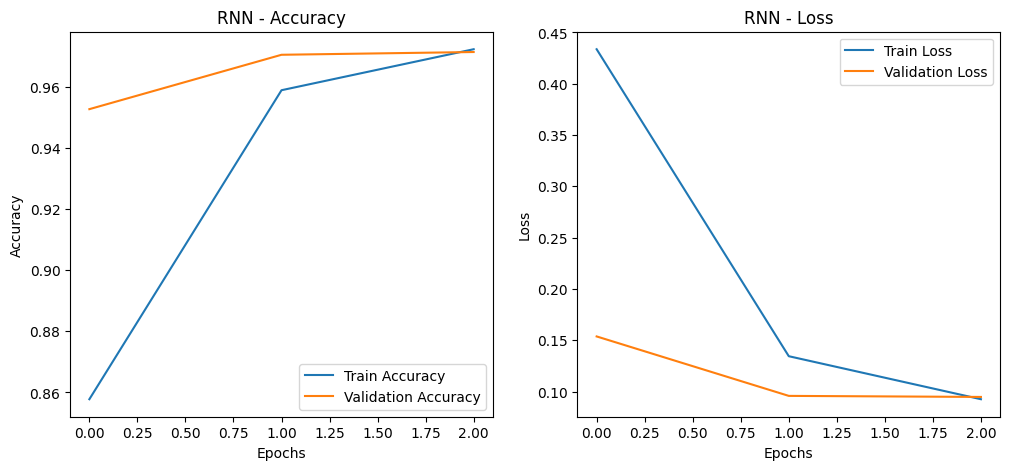

CNN Accuracy: 98.26%
RNN Accuracy: 97.14%
SVM Accuracy: 89.16%


In [ ]:
# 📌 Interactive User Input & Recognition
def recognize_digit():
    user_input = int(input("Enter a digit (0-9): "))
    sample_indices = np.where(y_test == user_input)[0]
    chosen_idx = np.random.choice(sample_indices)

    plt.imshow(x_test[chosen_idx], cmap='gray')
    plt.title(f"Random Handwritten Digit from MNIST: {user_input}")
    plt.show()

    cnn_prediction = np.argmax(cnn_model.predict(x_test_cnn[chosen_idx].reshape(1,28,28,1)))
    rnn_prediction = np.argmax(rnn_model.predict(x_test_rnn[chosen_idx].reshape(1,28,28)))
    svm_prediction = svm_model.predict(x_test_flat[chosen_idx].reshape(1,-1))[0]

    print(f"Predictions:\n CNN: {cnn_prediction} \n RNN: {rnn_prediction} \n SVM: {svm_prediction}")

recognize_digit()

# 📌 Epoch Accuracy vs Loss for CNN & RNN
def plot_training_history(history, title):
    plt.figure(figsize=(12,5))

    # Accuracy plot
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label="Train Accuracy")
    plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
    plt.title(f'{title} - Accuracy')
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss plot
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label="Train Loss")
    plt.plot(history.history['val_loss'], label="Validation Loss")
    plt.title(f'{title} - Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

plot_training_history(cnn_history, "CNN")
plot_training_history(rnn_history, "RNN")

# 📌 Accuracy Comparison
cnn_accuracy = cnn_model.evaluate(x_test_cnn, y_test_onehot, verbose=0)[1]
rnn_accuracy = rnn_model.evaluate(x_test_rnn, y_test_onehot, verbose=0)[1]
svm_accuracy = svm_model.score(x_test_flat, y_test)

print(f"CNN Accuracy: {cnn_accuracy * 100:.2f}%")
print(f"RNN Accuracy: {rnn_accuracy * 100:.2f}%")
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")



